In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
play=pd.read_csv("C:/Users/harsh/Downloads/googleplaystore.csv")

review=pd.read_csv("C:/Users/harsh/Downloads/googleplaystore_user_reviews.csv")

In [3]:
play

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [5]:
play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
play["Reviews"].str.isdigit().value_counts()

True     10840
False        1
Name: Reviews, dtype: int64

In [8]:
play[play["Reviews"].str.isdigit()==False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
def clean_reviews(x):
    if(x.isdigit()):
        return int(x)
    else:
        return float(x[:-1])*1000000

In [10]:
play["Reviews_SS"]=play["Reviews"].apply(clean_reviews)

In [11]:
play["Size"].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [12]:
def clean_size(x):
    if x.isdigit():
        return float(x)
    elif(x[-1]=="M"):
        return float(x[:-1])*1e06
    elif(x[-1]=="k"):
        return float(x[:-1])*1e03
    else:
        return np.nan

In [13]:
play["Size_SS"]=play["Size"].apply(clean_size)

In [14]:
play["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [15]:
play["Price_SS"]=play["Price"].apply(lambda x: float(x[1:] if x[0]=="$" else 0))

In [28]:
play["Genres1"]=play["Genres"].apply(lambda x:x.split(";")[0])

In [29]:
play["Genres2"]=play["Genres"].apply(lambda x:x.split(";")[1] if ";" in x else x)

In [18]:
play["Last Updated"].str.contains(".").value_counts()

True    10841
Name: Last Updated, dtype: int64

In [19]:
print(sorted((list(play["Last Updated"].unique()))))

['1.0.19', 'April 1, 2016', 'April 1, 2017', 'April 1, 2018', 'April 10, 2013', 'April 10, 2014', 'April 10, 2015', 'April 10, 2016', 'April 10, 2017', 'April 10, 2018', 'April 11, 2011', 'April 11, 2014', 'April 11, 2016', 'April 11, 2017', 'April 11, 2018', 'April 12, 2016', 'April 12, 2017', 'April 12, 2018', 'April 13, 2014', 'April 13, 2016', 'April 13, 2017', 'April 13, 2018', 'April 14, 2015', 'April 14, 2016', 'April 14, 2017', 'April 14, 2018', 'April 15, 2015', 'April 15, 2016', 'April 15, 2017', 'April 15, 2018', 'April 16, 2011', 'April 16, 2017', 'April 16, 2018', 'April 17, 2014', 'April 17, 2016', 'April 17, 2017', 'April 17, 2018', 'April 18, 2011', 'April 18, 2017', 'April 18, 2018', 'April 19, 2016', 'April 19, 2017', 'April 19, 2018', 'April 2, 2015', 'April 2, 2016', 'April 2, 2017', 'April 2, 2018', 'April 20, 2015', 'April 20, 2016', 'April 20, 2017', 'April 20, 2018', 'April 21, 2016', 'April 21, 2017', 'April 21, 2018', 'April 22, 2013', 'April 22, 2014', 'April

In [20]:
def clean_lastupdated(x):
    if x=="1.0.19":
        return np.nan
    else:
        return pd.to_datetime(x)

In [21]:
play["Last Updated_SS"]=play["Last Updated"].apply(clean_lastupdated)

In [22]:
play = play.drop_duplicates(keep="first").reset_index(drop=True)
play

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_SS,Size_SS,Price_SS,Genres2,Last Updated_SS
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159.0,19000000.0,0.0,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967.0,14000000.0,0.0,Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510.0,8700000.0,0.0,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644.0,25000000.0,0.0,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967.0,2800000.0,0.0,Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,38.0,53000000.0,0.0,Education,2017-07-25
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,4.0,3600000.0,0.0,Education,2018-07-06
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,3.0,9500000.0,0.0,Medical,2017-01-20
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,114.0,NaN,0.0,Books & Reference,2015-01-19


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

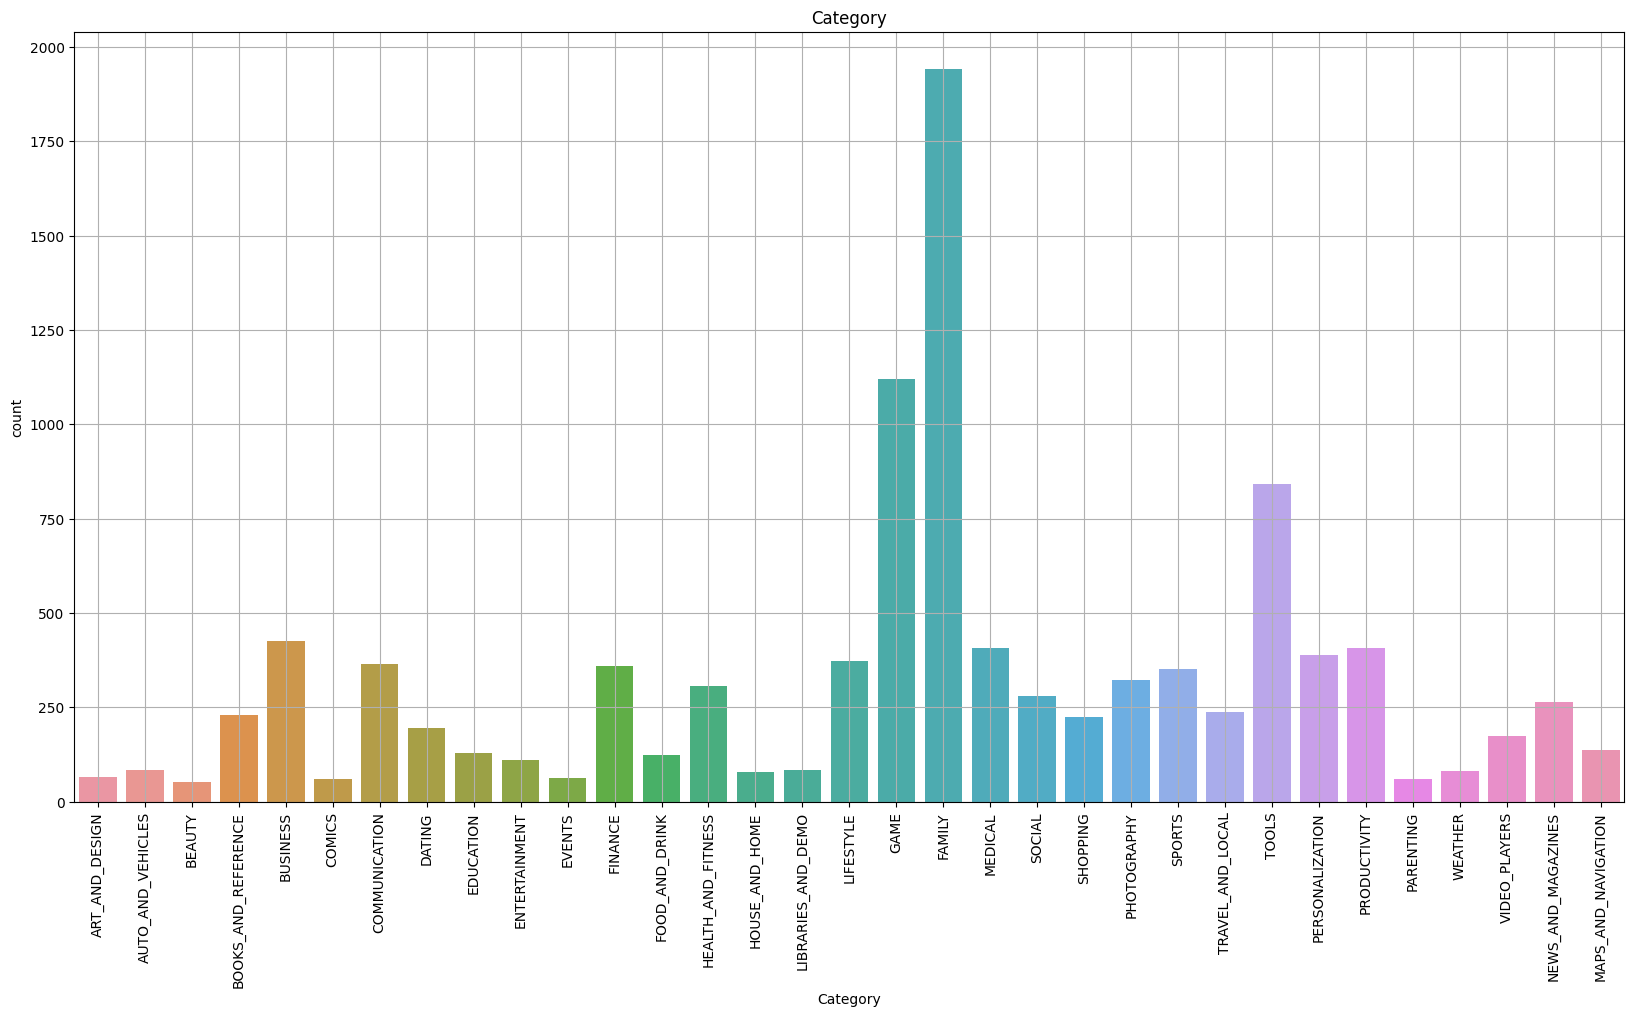

In [36]:
plt.figure(figsize=(20,10))
y=play[play["Category"]!='1.9']
sb.countplot(data=y,x="Category")
plt.title("Category")
plt.grid()
plt.xticks(rotation=90)

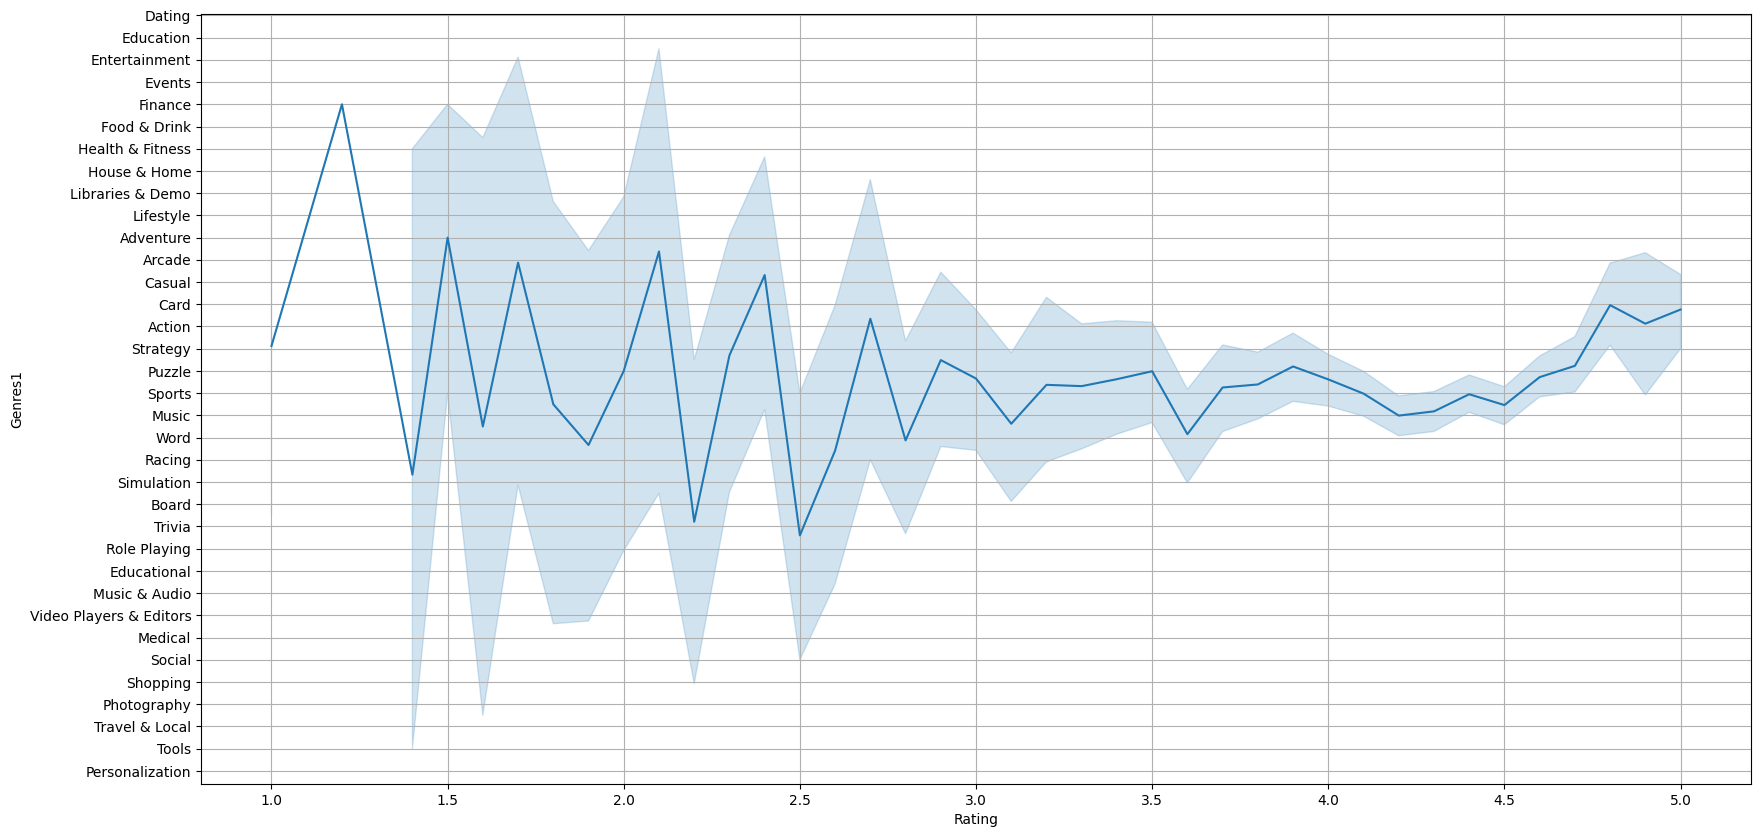

In [35]:
plt.figure(figsize=(20,10))
x=play[play["Genres1"]!="February 11, 2018"]
sb.lineplot(data=x,x="Rating", y="Genres1")
plt.grid()

C:\Users\harsh\AppData\Local\Temp\ipykernel_4184\1674686057.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x=play["Rating"])


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(-2.5, 0, '−2.5'),
  Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0'),
  Text(22.5, 0, '22.5')])

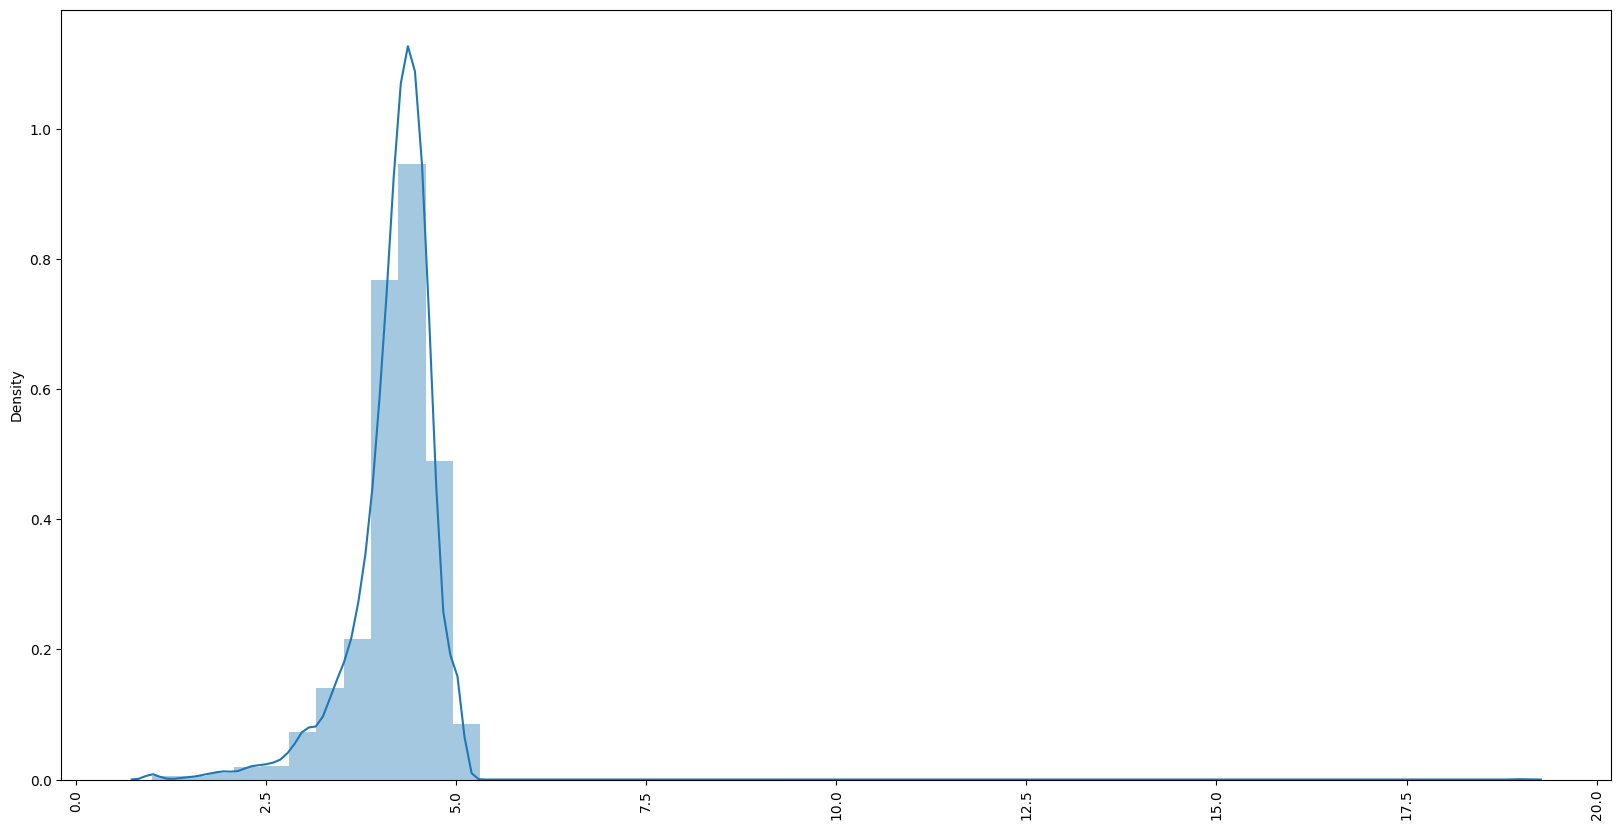

In [45]:
plt.figure(figsize=[20,10])
sb.distplot(x=play["Rating"])
plt.xticks(rotation=90)

C:\Users\harsh\AppData\Local\Temp\ipykernel_4184\3532542623.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x=play["Price_SS"])


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

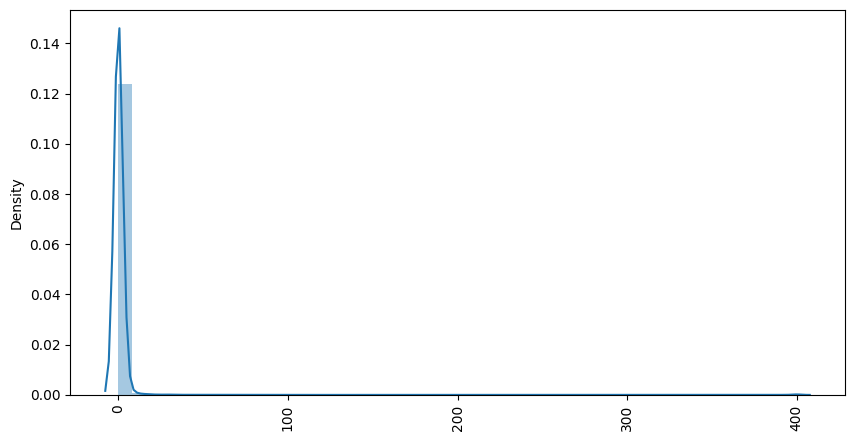

In [50]:
plt.figure(figsize=[10,5])
sb.distplot(x=play["Price_SS"])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

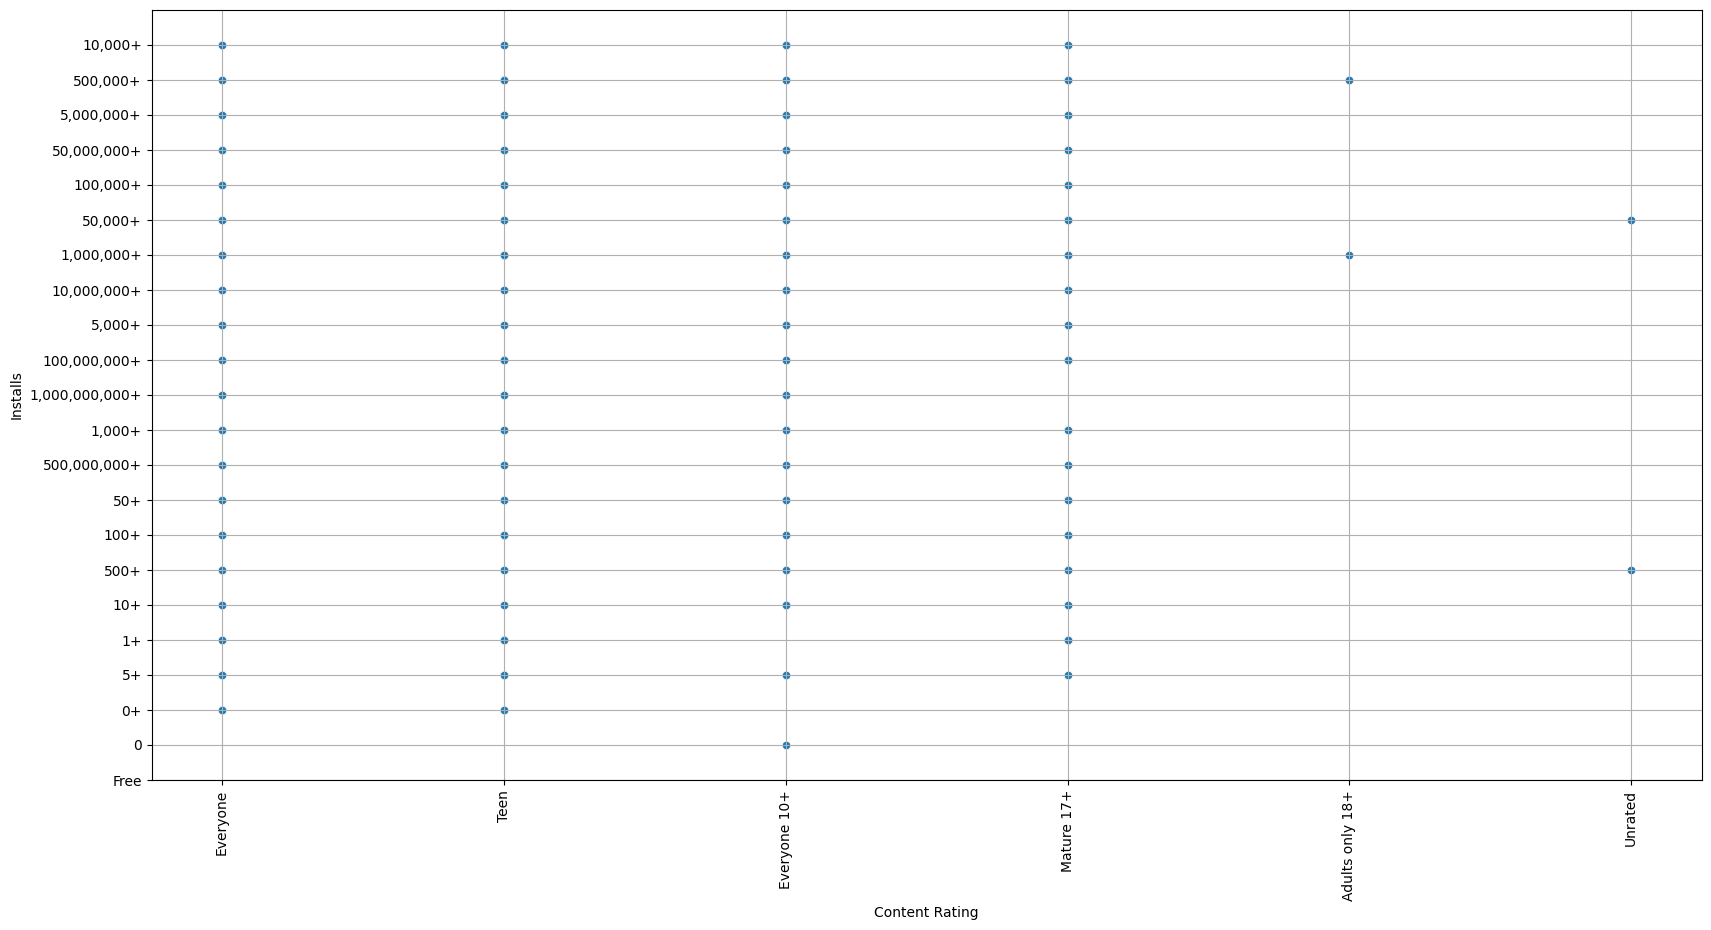

In [56]:
plt.figure(figsize=(20,10))
sb.scatterplot(x=play["Content Rating"],y=play["Installs"])
plt.grid()
plt.xticks(rotation=90)

[]

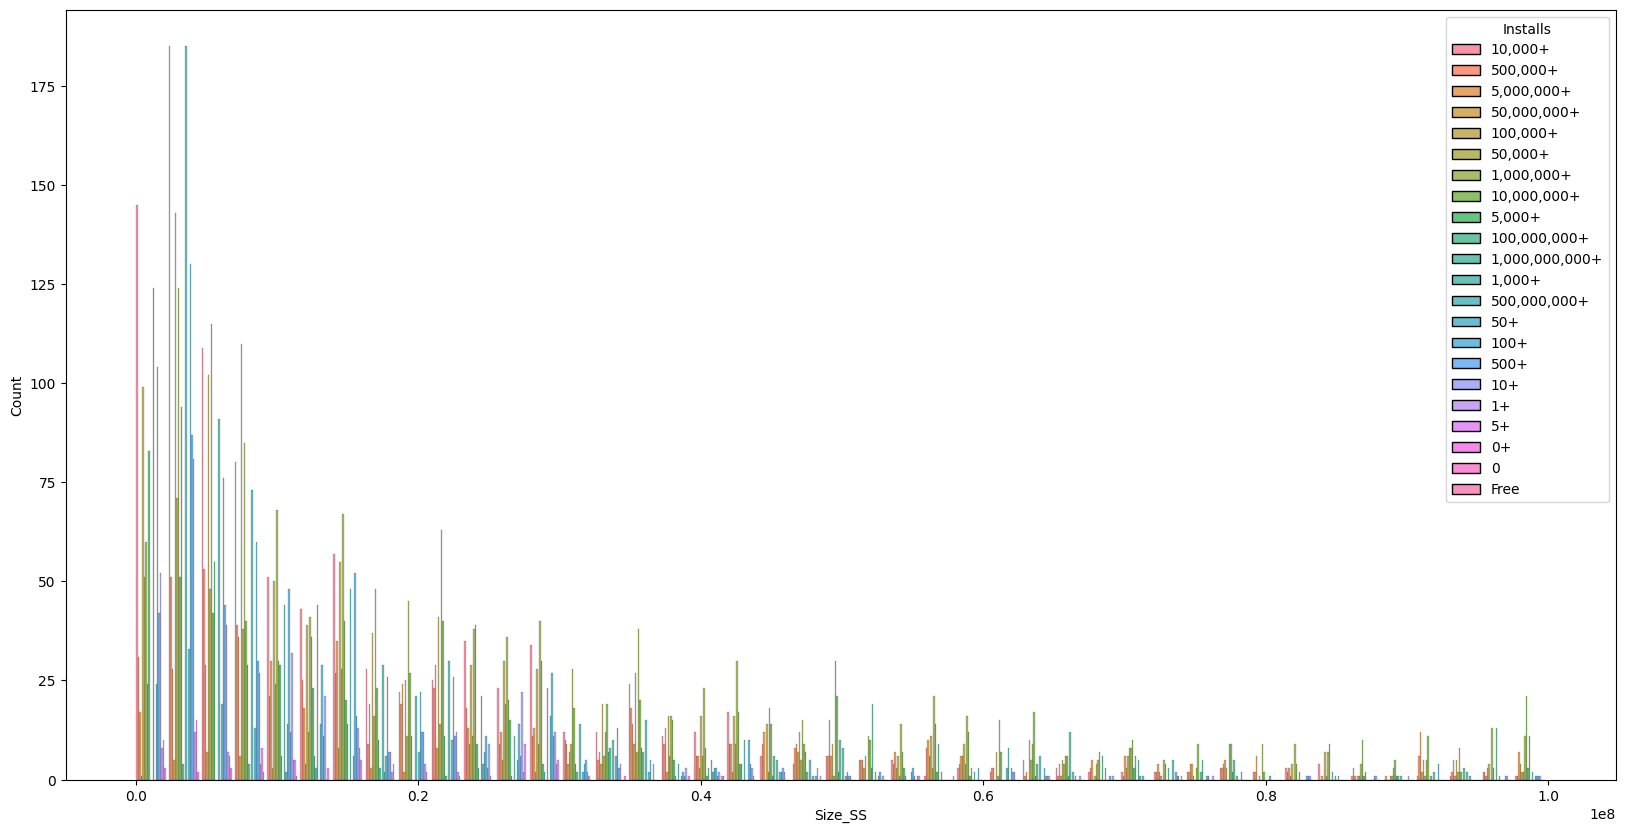

In [59]:
plt.figure(figsize=[20,10])
sb.histplot(play,x="Size_SS",hue="Installs", multiple="dodge")
plt.plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '4.0.3 and up'),
  Text(1, 0, '4.2 and up'),
  Text(2, 0, '4.4 and up'),
  Text(3, 0, '2.3 and up'),
  Text(4, 0, '3.0 and up'),
  Text(5, 0, '4.1 and up'),
  Text(6, 0, '4.0 and up'),
  Text(7, 0, '2.3.3 and up'),
  Text(8, 0, 'Varies with device'),
  Text(9, 0, '2.2 and up'),
  Text(10, 0, '5.0 and up'),
  Text(11, 0, '6.0 and up'),
  Text(12, 0, '1.6 and up'),
  Text(13, 0, '1.5 and up'),
  Text(14, 0, '2.1 and up'),
  Text(15, 0, '7.0 and up'),
  Text(16, 0, '5.1 and up'),
  Text(17, 0, '4.3 and up'),
  Text(18, 0, '4.0.3 - 7.1.1'),
  Text(19, 0, '2.0 and up'),
  Text(20, 0, '3.2 and up'),
  Text(21, 0, '4.4W and up'),
  Text(22, 0, '7.1 and up'),
  Text(23, 0, '7.0 - 7.1.1'),
  Text(24, 0, '8.0 and up'),
  Text(25, 0, '5.0 - 8.0'),
  Text(26, 0, '3.1 and up'),
  Text(27, 0, '2.0.1 and up'),
  Text(28, 0, '4.1 - 7.1.1'),


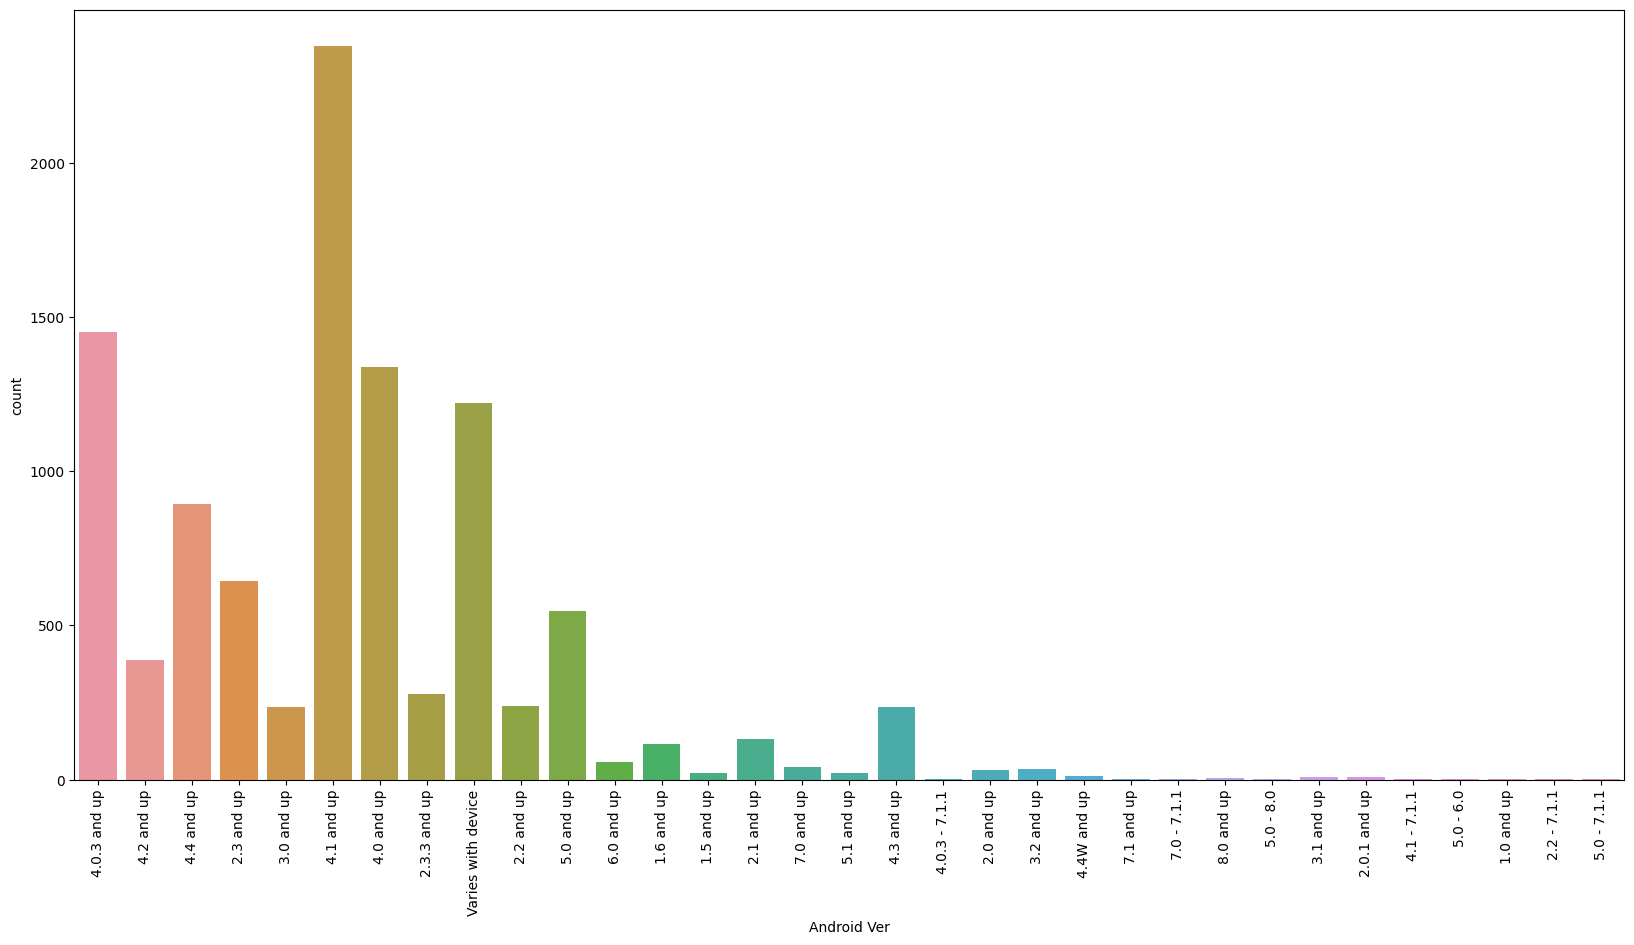

In [62]:
plt.figure(figsize=[20,10])
sb.countplot(x=play["Android Ver"])
plt.xticks(rotation=90)